In [1]:
# Comenzamos importando las librerias a utilizar, 
# y creamos nuestro primer dataframe del archivo de datos internos de nuestra empresa,
# que previamente hemos subido mediante importación directa de fichero

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from pyspark.sql import SparkSession

# Crear la sesión de Spark
spark = SparkSession.builder.getOrCreate()

# Ruta del archivo .csv
matriculas_csv = "abfss://ProyGH@onelake.dfs.fabric.microsoft.com/PROYGH.Lakehouse/Files/ISEN MATRICULAS/DATOS_ISEN.csv"

# Leer el archivo .csv utilizando pandas
df_m= pd.read_csv(matriculas_csv, delimiter=';')


# Mostrar el DataFrame de PySpark
display(df_m)


StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 3, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


SynapseWidget(Synapse.DataFrame, 5ccc6589-6b3a-46c6-a70e-8bd6857b020c)

In [2]:
# obtengo la info del dataframe creado
df_m.info()

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 4, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CURSO                    18 non-null     object 
 1   OFERTA_TOTAL             18 non-null     int64  
 2   DEMANDA_TOTAL            18 non-null     int64  
 3   MATRICULAS_TOTAL         18 non-null     int64  
 4   OFERTAUNIV_G.PRIM        18 non-null     int64  
 5   DEMANDAUNIV_G.PRIM       18 non-null     int64  
 6   MATRICULASUNIV_G.PRIM    18 non-null     int64  
 7   OFERTA_ISEN_G.PRIM       18 non-null     int64  
 8   DEMANDA_ISEN_G.PRIM      18 non-null     int64  
 9   MATRICULAS_ISEN_G.PRIM   18 non-null     int64  
 10  OFERTAUMU_G.PRIM         18 non-null     int64  
 11  DEMANDAUMU_G.PRIM        18 non-null     int64  
 12  MATRICULASUMU_G.PRIM     18 non-null     int64  
 13  ZONA _CARTAGENA          18 non-null     int64  
 14  ZONA_MURCIA              18 

In [3]:
# modifico el tipo de datos del campo "ZONA_OTROS" a número entero, sabiendo que tiene valores ausentes que los relleno con ceros

df_m['ZONA_OTROS'] = df_m['ZONA_OTROS'].fillna(0)
df_m['ZONA_OTROS'] = df_m['ZONA_OTROS'].astype(int)
df_m['NOTA_CORTE'] = df_m['NOTA_CORTE'].str.replace(',', '.').astype(float)

df_m.info()

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 5, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CURSO                    18 non-null     object 
 1   OFERTA_TOTAL             18 non-null     int64  
 2   DEMANDA_TOTAL            18 non-null     int64  
 3   MATRICULAS_TOTAL         18 non-null     int64  
 4   OFERTAUNIV_G.PRIM        18 non-null     int64  
 5   DEMANDAUNIV_G.PRIM       18 non-null     int64  
 6   MATRICULASUNIV_G.PRIM    18 non-null     int64  
 7   OFERTA_ISEN_G.PRIM       18 non-null     int64  
 8   DEMANDA_ISEN_G.PRIM      18 non-null     int64  
 9   MATRICULAS_ISEN_G.PRIM   18 non-null     int64  
 10  OFERTAUMU_G.PRIM         18 non-null     int64  
 11  DEMANDAUMU_G.PRIM        18 non-null     int64  
 12  MATRICULASUMU_G.PRIM     18 non-null     int64  
 13  ZONA _CARTAGENA          18 non-null     int64  
 14  ZONA_MURCIA              18 

In [4]:
# comprobamos si hay valores nulos
any(df_m.isnull().sum())

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 6, Finished, Available)

False

In [5]:
# Vemos el número de filas y columnas
print(df_m.shape)


StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 7, Finished, Available)

(18, 18)


In [6]:
# creamos un dataframe de la tabla delta creada por nuestro dataflow e integrada en el lakehouse

from delta import DeltaTable

# Especifica la ruta de la tabla Delta
poblacion = "abfss://ProyGH@onelake.dfs.fabric.microsoft.com/PROYGH.Lakehouse/Tables/Poblacion"

# Carga la tabla Delta utilizando DeltaTable
tabla_delta = DeltaTable.forPath(spark, poblacion)

# Lee los datos de la tabla Delta en un DataFrame de PySpark
df_spark = tabla_delta.toDF()

# Convierte el DataFrame de PySpark a un DataFrame de Pandas
df_p = df_spark.toPandas()

# Muestra el DataFrame de Pandas
print(df_p)
print(df_p.shape)
df_p.info()

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 8, Finished, Available)

     Año      Curso  POBLACION_CARTAGENA  POBLACION_MURCIA
0   2005  2005/2006                 2494             16062
1   2006  2006/2007                 2476             16297
2   2007  2007/2008                 2389             16442
3   2008  2008/2009                 2449             16824
4   2009  2009/2010                 2479             16891
5   2010  2010/2011                 2374             16706
6   2011  2011/2012                 2333             16643
7   2012  2012/2013                 2326             16306
8   2013  2013/2014                 2161             15273
9   2014  2014/2015                 2152             15509
10  2015  2015/2016                 2229             15592
11  2016  2016/2017                 2240             15849
12  2017  2017/2018                 2273             15801
13  2018  2018/2019                 2205             15950
14  2019  2019/2020                 2415             16830
15  2020  2020/2021                 2395             172

In [7]:
# Hacemos un leftjoin de los dos dataframes para tener los datos de matriculaciones y poblacionales en un solo dataframe
df = df_m.merge(df_p, left_on="CURSO", right_on="Curso", how="left")
print(df)
df.info()
print(df.shape)



StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 9, Finished, Available)

        CURSO  OFERTA_TOTAL  DEMANDA_TOTAL  MATRICULAS_TOTAL  \
0   2022/2023          6811          21038              5876   
1   2021/2022          6750          20255              5797   
2   2020/2021          6785          19501              6142   
3   2019/2020          6892          15621              6065   
4   2018/2019          7034          15915              6118   
5   2017/2018          6796          15717              6129   
6   2016/2017          6728          16499              6470   
7   2015/2016          6743          16170              6274   
8   2014/2015          6645          16172              6241   
9   2013/2014          6729          17090              6444   
10  2012/2013          6832          17120              6456   
11  2011/2012          6865          17183              6465   
12  2010/2011          6905          17105              6487   
13  2009/2010          6645          17155              6241   
14  2008/2009          6656          170

In [8]:
# quitamos la columna repetida "Curso"
df = df.drop("Curso", axis=1)
print(df)
df.info()


StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 10, Finished, Available)

        CURSO  OFERTA_TOTAL  DEMANDA_TOTAL  MATRICULAS_TOTAL  \
0   2022/2023          6811          21038              5876   
1   2021/2022          6750          20255              5797   
2   2020/2021          6785          19501              6142   
3   2019/2020          6892          15621              6065   
4   2018/2019          7034          15915              6118   
5   2017/2018          6796          15717              6129   
6   2016/2017          6728          16499              6470   
7   2015/2016          6743          16170              6274   
8   2014/2015          6645          16172              6241   
9   2013/2014          6729          17090              6444   
10  2012/2013          6832          17120              6456   
11  2011/2012          6865          17183              6465   
12  2010/2011          6905          17105              6487   
13  2009/2010          6645          17155              6241   
14  2008/2009          6656          170

In [9]:
# comprobamos si hay duplicados
df.duplicated()

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 11, Finished, Available)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

In [10]:
# revisamos el dataframe después de los cambios realizados
df.info()

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 12, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CURSO                    18 non-null     object 
 1   OFERTA_TOTAL             18 non-null     int64  
 2   DEMANDA_TOTAL            18 non-null     int64  
 3   MATRICULAS_TOTAL         18 non-null     int64  
 4   OFERTAUNIV_G.PRIM        18 non-null     int64  
 5   DEMANDAUNIV_G.PRIM       18 non-null     int64  
 6   MATRICULASUNIV_G.PRIM    18 non-null     int64  
 7   OFERTA_ISEN_G.PRIM       18 non-null     int64  
 8   DEMANDA_ISEN_G.PRIM      18 non-null     int64  
 9   MATRICULAS_ISEN_G.PRIM   18 non-null     int64  
 10  OFERTAUMU_G.PRIM         18 non-null     int64  
 11  DEMANDAUMU_G.PRIM        18 non-null     int64  
 12  MATRICULASUMU_G.PRIM     18 non-null     int64  
 13  ZONA _CARTAGENA          18 non-null     int64  
 14  ZONA_MURCIA              18 

In [11]:
# cambiamos el nombre de la columna 'CAMPAÑA_MATRICULACIONES' to 'GASTO_PUBLICIDAD' Y quitamos la columna Año
df = df.rename(columns={'CAMPAÑA_MATRICULACIONES': 'GASTO_PUBLICIDAD'})
df = df.drop("Año", axis=1)
df.head()

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 13, Finished, Available)

CURSO  OFERTA_TOTAL  DEMANDA_TOTAL  MATRICULAS_TOTAL  \
0  2022/2023          6811          21038              5876   
1  2021/2022          6750          20255              5797   
2  2020/2021          6785          19501              6142   
3  2019/2020          6892          15621              6065   
4  2018/2019          7034          15915              6118   

   OFERTAUNIV_G.PRIM  DEMANDAUNIV_G.PRIM  MATRICULASUNIV_G.PRIM  \
0                410                 848                    396   
1                420                 719                    390   
2                470                 772                    435   
3                500                 646                    433   
4                574                 806                    491   

   OFERTA_ISEN_G.PRIM  DEMANDA_ISEN_G.PRIM  MATRICULAS_ISEN_G.PRIM  \
0                 100                   79                      78   
1                 110                   71                      72   
2                 110                   60                      57   
3                 140                   70                      65   
4                 154                   67                      62   

   OFERTAUMU_G.PRIM  DEMANDAUMU_G.PRIM  MATRICULASUMU_G.PRIM  ZONA _CARTAGENA  \
0               310                769                   318               66   
1               310                648                   318               58   
2               360                712                   378               52   
3               360                576                   368               56   
4               420                739                   429               47   

   ZONA_MURCIA  ZONA_OTROS  NOTA_CORTE  GASTO_PUBLICIDAD  POBLACION_CARTAGENA  \
0           10           2      10.348             82536                 2595   
1            8           6      10.200            153420                 2492   
2            5           0       9.783             96620                 2395   
3            9           0       8.961             79230                 2415   
4           11           4       8.506             68523                 2205   

   POBLACION_MURCIA  
0             18120  
1             17317  
2             17221  
3             16830  
4             15950

In [12]:
# mostarmos un resumen estadístico
df.describe()

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 14, Finished, Available)

OFERTA_TOTAL  DEMANDA_TOTAL  MATRICULAS_TOTAL  OFERTAUNIV_G.PRIM  \
count     18.000000      18.000000         18.000000          18.000000   
mean    6759.777778   17105.833333       6214.000000         560.055556   
std      136.789901    1569.755030        213.285227          66.016462   
min     6450.000000   15621.000000       5797.000000         410.000000   
25%     6674.000000   16081.500000       6078.250000         541.000000   
50%     6767.500000   16794.500000       6191.500000         594.500000   
75%     6845.500000   17146.250000       6444.000000         605.000000   
max     7034.000000   21038.000000       6487.000000         605.000000   

       DEMANDAUNIV_G.PRIM  MATRICULASUNIV_G.PRIM  OFERTA_ISEN_G.PRIM  \
count           18.000000              18.000000           18.000000   
mean           917.444444             505.444444          140.666667   
std            133.301614              55.981323           18.597913   
min            646.000000             390.000000          100.000000   
25%            841.250000             491.500000          142.500000   
50%            924.500000             522.000000          150.000000   
75%            982.250000             543.750000          150.000000   
max           1164.000000             574.000000          154.000000   

       DEMANDA_ISEN_G.PRIM  MATRICULAS_ISEN_G.PRIM  OFERTAUMU_G.PRIM  \
count            18.000000               18.000000         18.000000   
mean             93.444444               90.444444        419.388889   
std              19.033167               19.599586         50.067177   
min              60.000000               57.000000        310.000000   
25%              80.250000               74.250000        420.000000   
50%              96.000000               93.000000        444.500000   
75%             106.250000              104.000000        455.000000   
max             126.000000              120.000000        455.000000   

       DEMANDAUMU_G.PRIM  MATRICULASUMU_G.PRIM  ZONA _CARTAGENA  ZONA_MURCIA  \
count          18.000000             18.000000        18.000000    18.000000   
mean          824.000000            412.777778        81.555556    10.166667   
std           121.265387             41.888585        24.560184     5.415120   
min           576.000000            318.000000        47.000000     4.000000   
25%           752.500000            408.000000        57.250000     6.250000   
50%           811.500000            424.500000        85.000000     9.000000   
75%           896.000000            432.000000       107.500000    11.750000   
max          1066.000000            455.000000       115.000000    27.000000   

       ZONA_OTROS  NOTA_CORTE  GASTO_PUBLICIDAD  POBLACION_CARTAGENA  \
count   18.000000   18.000000         18.000000            18.000000   
mean     0.944444    8.298667      69931.277778          2359.833333   
std      1.731107    0.960389      24244.602824           128.185183   
min      0.000000    7.201000      46856.000000          2152.000000   
25%      0.000000    7.607750      56377.000000          2248.250000   
50%      0.000000    8.150000      64799.000000          2381.500000   
75%      1.000000    8.492500      72339.000000          2469.250000   
max      6.000000   10.348000     153420.000000          2595.000000   

       POBLACION_MURCIA  
count         18.000000  
mean       16424.055556  
std          725.120069  
min        15273.000000  
25%        15874.250000  
50%        16374.000000  
75%        16828.500000  
max        18120.000000

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 15, Finished, Available)

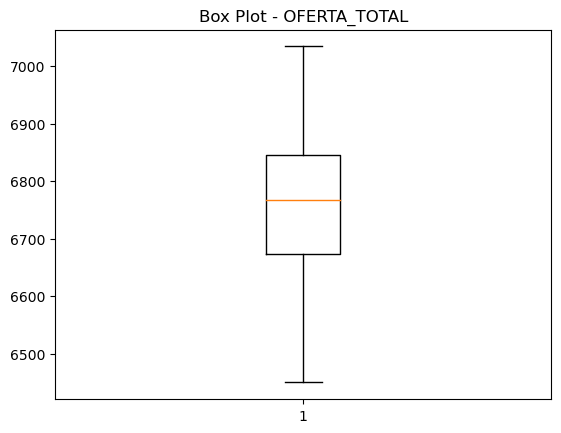

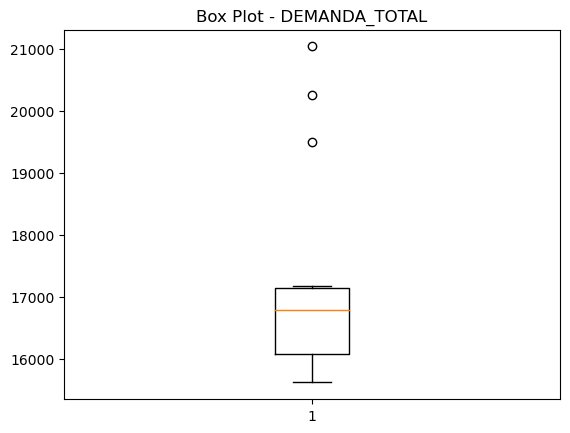

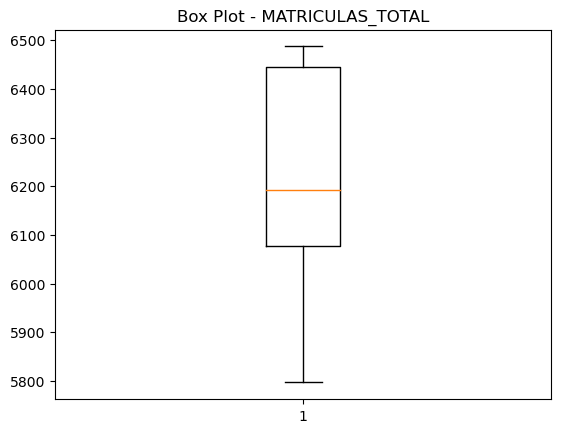

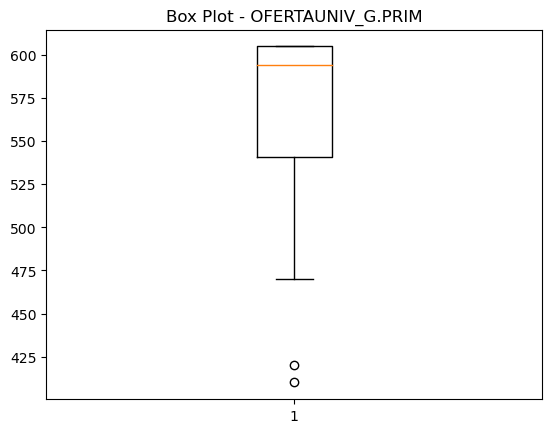

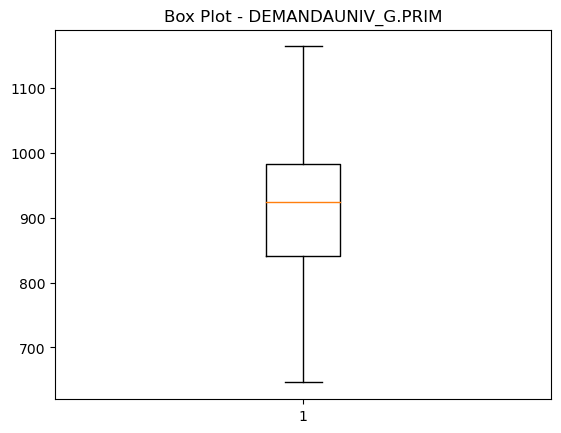

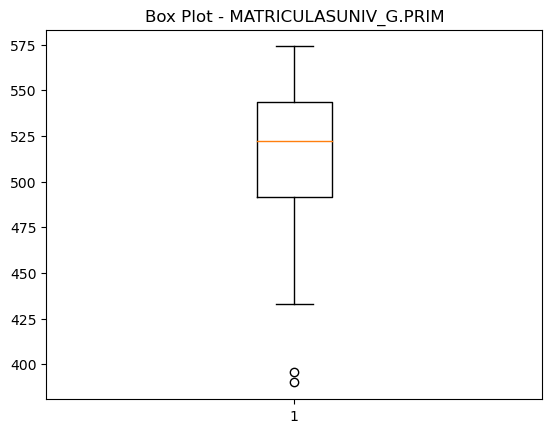

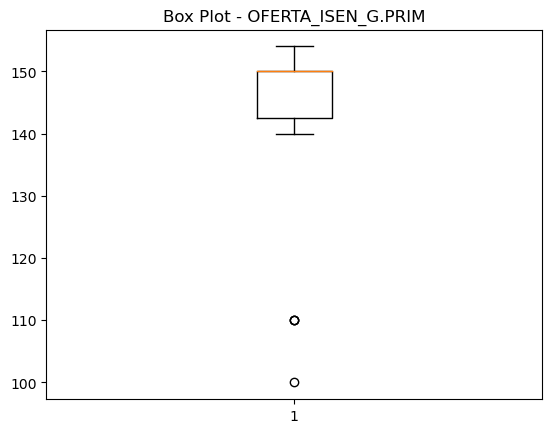

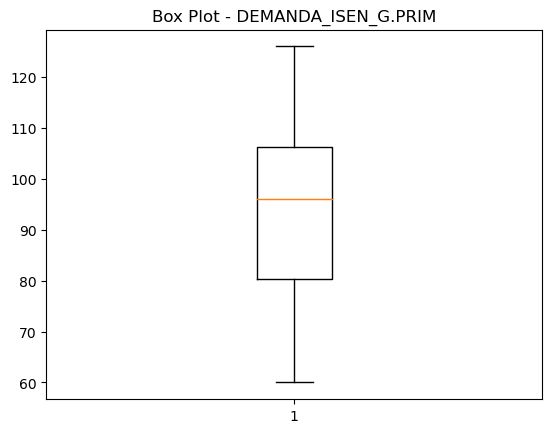

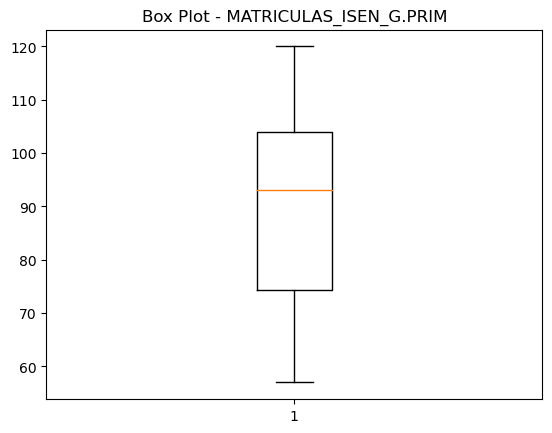

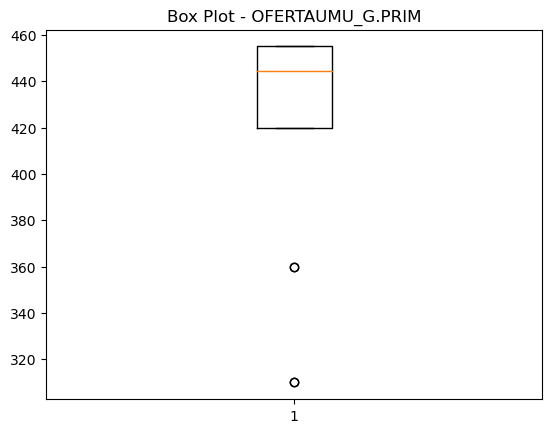

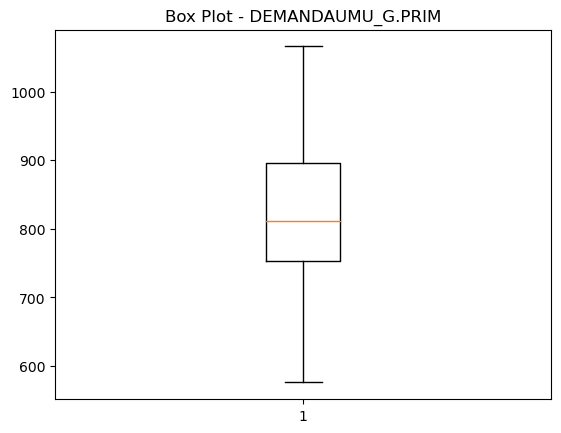

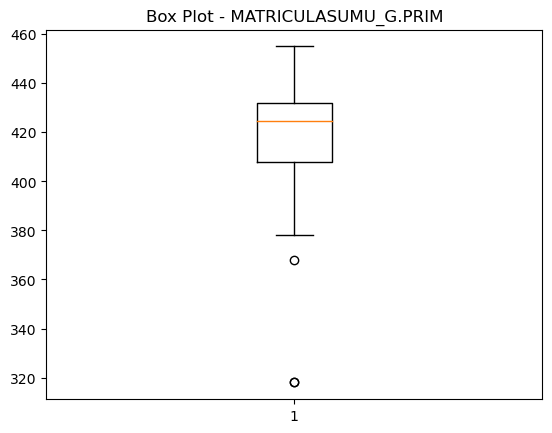

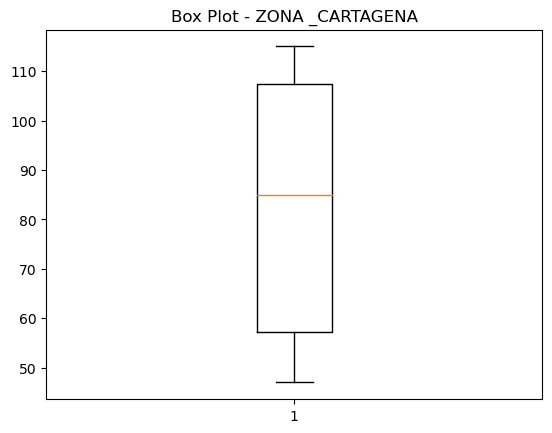

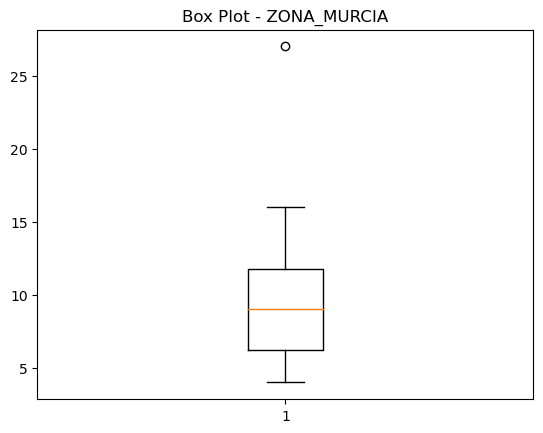

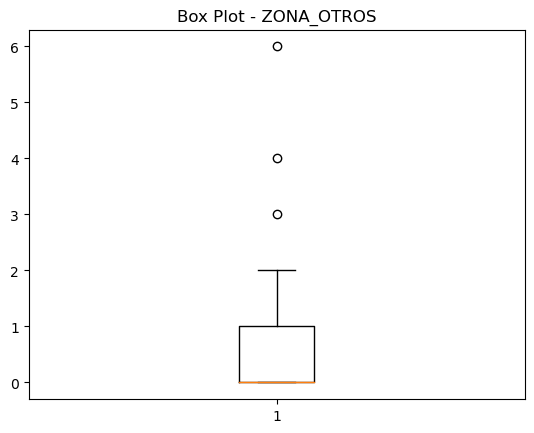

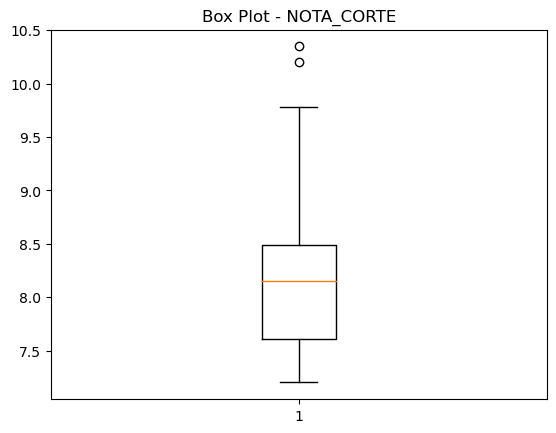

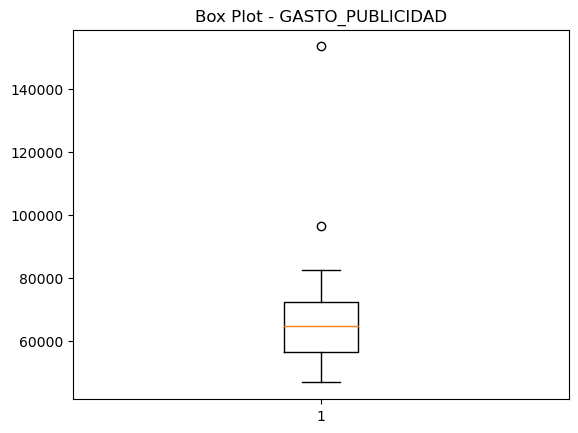

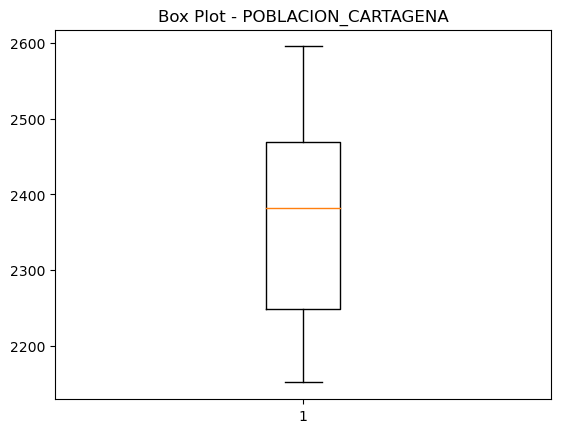

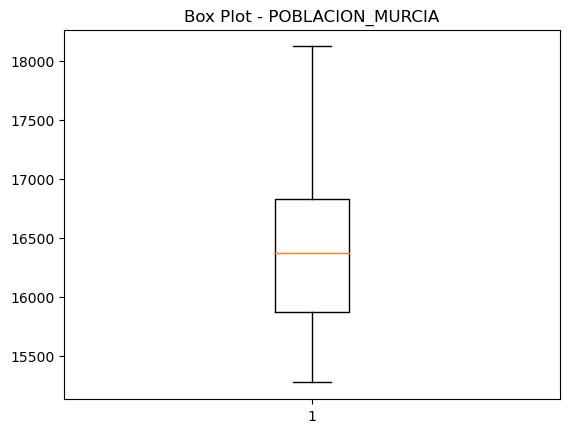

In [13]:
# observamos que no hay diferencias significativas en las medidas, pero nos aseguramos de que no hayan ouliers visualizando los box plots de las variables

# Obtener las columnas numéricas del DataFrame
numeric_columns = df.select_dtypes(include=np.number).columns

# Generar el box plot para cada columna numérica
for column in numeric_columns:
    plt.boxplot(df[column].values)
    plt.title('Box Plot - ' + column)

    # Mostrar el gráfico
    plt.show()


please upload to lakehouse

Vemos outliers en:
GASTOS_PUBLICIDAD, NOTA CORTE, ZONA_OTROS, OFERTA_UMU, OFERTA_ISEN, OFERTA UNIV (estas tres ultimas están correlacionadas, ya que dependen la una de la otra)


In [14]:
# Mostramos en un histograma la distribución de la demanda ISEN por habitantes totales de la RM

fig = px.histogram(df, x="DEMANDA_ISEN_G.PRIM", height = 600)
fig.show()

# Identificamos el número entre 50-119

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 16, Finished, Available)

In [15]:
# vamos a ver la relación entre variables por medio de un diagrama de dispersión

fig1 = px.scatter(df, x='DEMANDA_ISEN_G.PRIM', y='POBLACION_MURCIA',
                    height=600, color_continuous_scale=['green','red'],
                    title="Demanda ISEN por Población RM")
fig1.update_layout(coloraxis_showscale=False)
fig1.show()

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 17, Finished, Available)

In [16]:

fig1 = px.scatter(df, x='DEMANDA_ISEN_G.PRIM', y='POBLACION_CARTAGENA',
                    height=600, color_continuous_scale=['green','red'],
                    title="DEMANDA ISEN por Población Cartagena")
fig1.update_layout(coloraxis_showscale=False)
fig1.show()

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 18, Finished, Available)

In [17]:

fig1 = px.scatter(df, x='DEMANDA_ISEN_G.PRIM', y='GASTO_PUBLICIDAD',
                    height=600, color_continuous_scale=['green','red'],
                    title="DEMANDA ISEN por Gasto en Campaña Publicitaria")
fig1.update_layout(coloraxis_showscale=False)
fig1.show()

# vemos que no hay correlación entre estas variables, un dato fundamental para la toma de decisiones

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 19, Finished, Available)

In [19]:

fig1 = px.scatter(df, x='DEMANDA_ISEN_G.PRIM', y='DEMANDAUNIV_G.PRIM',
                    height=600, color_continuous_scale=['green','red'],
                    title="DEMANDA ISEN por Demanda total en el G.Primaria")
fig1.update_layout(coloraxis_showscale=False)
fig1.show()

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 21, Finished, Available)

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 22, Finished, Available)

/tmp/ipykernel_7824/402441284.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

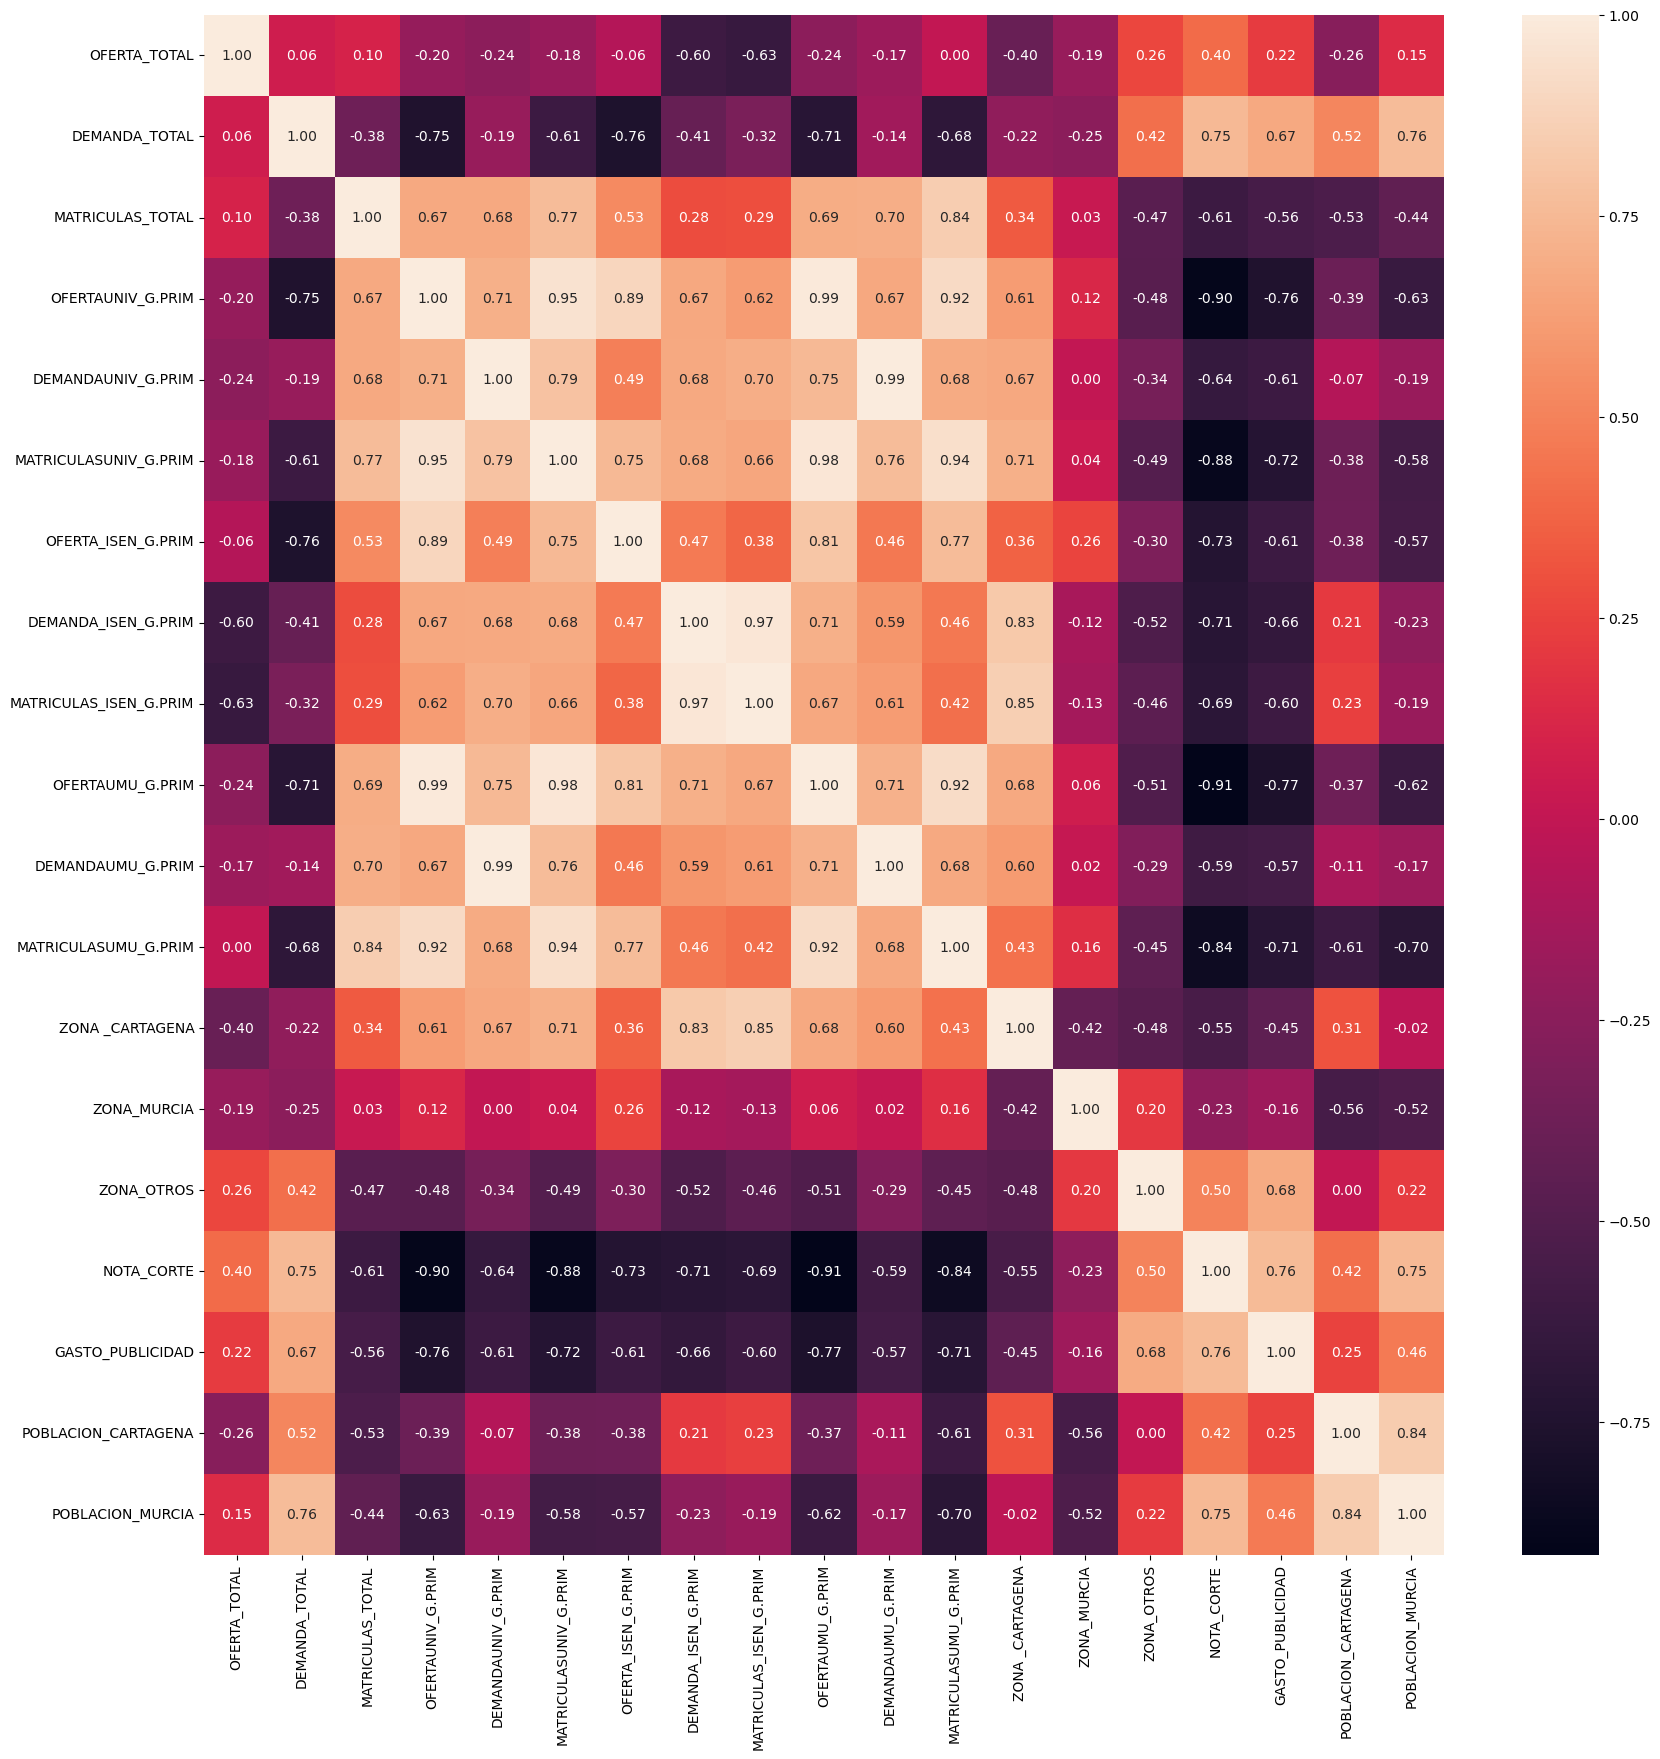

In [20]:
# visualizamos las correlaciones por pares mediante un mapa de calor para poder eliminar variables sin valor para nuestro modelo
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

**Resumen del Análisi Descriptiv**o


En función de los resultados obtenidos podemos concluir que las variables significativas para explicar la demanda son: OFERTA_UMU_G.PRIM (0.71), DEMANDA_UMU_G.PRIM (0.59), NOTA_CORTE(-0.71), GASTOS_PUBLICIDAD(-0.66)

Llegados a este punto podemos determinar que el problema a resolver requiere de un modelo de regresión lineal múltiple.
Por otro lado, el planteamiento original de que se podría predecir la demanda de nuevas matriculaciones en función del volumen de población no es realista, ya que vemos una correlación del 0.21 para la POBLACION_CARTAGENA  y de -0.23 para POBLACION_MURCIA, que es de donde proceden el 98% de nuestros alumnos.
Otra observación relevante para el negocio es el comportamiento del GASTO_PUBLICIDAD que sorprendentemente tiene una correlación media y negativa con la demanda, por lo que se deberá replantear los medios de publicidad utilizados y su cuantía.

In [23]:
df.info()

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 25, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CURSO                   18 non-null     object 
 1   OFERTA_TOTAL            18 non-null     int64  
 2   DEMANDA_TOTAL           18 non-null     int64  
 3   MATRICULAS_TOTAL        18 non-null     int64  
 4   OFERTAUNIV_G.PRIM       18 non-null     int64  
 5   DEMANDAUNIV_G.PRIM      18 non-null     int64  
 6   MATRICULASUNIV_G.PRIM   18 non-null     int64  
 7   OFERTA_ISEN_G.PRIM      18 non-null     int64  
 8   DEMANDA_ISEN_G.PRIM     18 non-null     int64  
 9   MATRICULAS_ISEN_G.PRIM  18 non-null     int64  
 10  OFERTAUMU_G.PRIM        18 non-null     int64  
 11  DEMANDAUMU_G.PRIM       18 non-null     int64  
 12  MATRICULASUMU_G.PRIM    18 non-null     int64  
 13  ZONA _CARTAGENA         18 non-null     int64  
 14  ZONA_MURCIA             18 non-null     int6

In [27]:
# en función de los resultados obtenidos decidimos conservar las siguientes variables
df_ajustado = df[['OFERTAUMU_G.PRIM','DEMANDAUNIV_G.PRIM','POBLACION_CARTAGENA','GASTO_PUBLICIDAD', 'DEMANDA_ISEN_G.PRIM']]
print(df_ajustado)

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 29, Finished, Available)

    OFERTAUMU_G.PRIM  DEMANDAUNIV_G.PRIM  POBLACION_CARTAGENA  \
0                310                 848                 2595   
1                310                 719                 2492   
2                360                 772                 2395   
3                360                 646                 2415   
4                420                 806                 2205   
5                420                 839                 2273   
6                420                 919                 2240   
7                420                 885                 2229   
8                434                 974                 2152   
9                455                 985                 2161   
10               455                1008                 2326   
11               455                 948                 2333   
12               455                1164                 2374   
13               455                1089                 2479   
14               455     

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 30, Finished, Available)

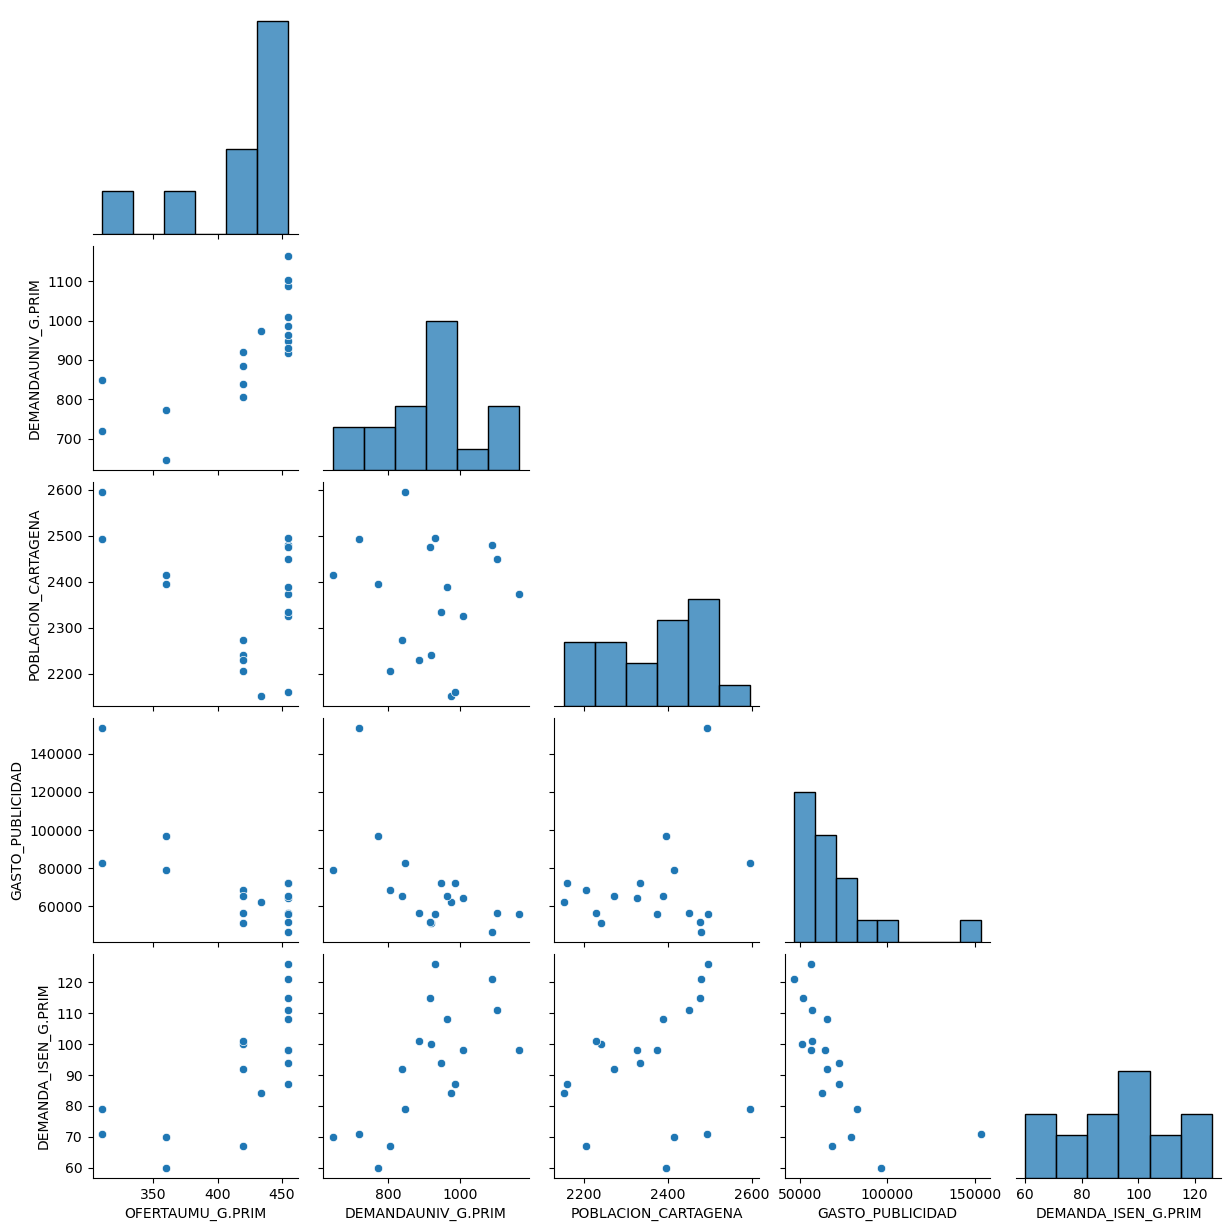

In [28]:

# CREAMOS UN PAIR PLOT POR PARES para ver mejor las relaciones existentes entre las variables mantenidas
sns.pairplot(df_ajustado, corner=True)

In [29]:
# Analizamos si las variables que hemos seleccionado para el modelo tienen outliers en POBLACION_CARTAGERNA
Q1 = np.percentile(df_ajustado['POBLACION_CARTAGENA'], q=25)
Q3 = np.percentile(df_ajustado['POBLACION_CARTAGENA'], q=75)


iqr = Q3-Q1
step = 1.5 * iqr

display(df_ajustado[~((df_ajustado['POBLACION_CARTAGENA'] >= Q1 - step) & (df_ajustado['POBLACION_CARTAGENA'] <= Q3 + step))])



StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 31, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:486: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



SynapseWidget(Synapse.DataFrame, 7efe986b-d5f8-4a02-a287-48ff76335b2c)

Hay dos outliers en las variables seleccionadas del modelo, pero al ser una muestra tan pequeña no vamos a hacer nada al respecto

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 32, Finished, Available)

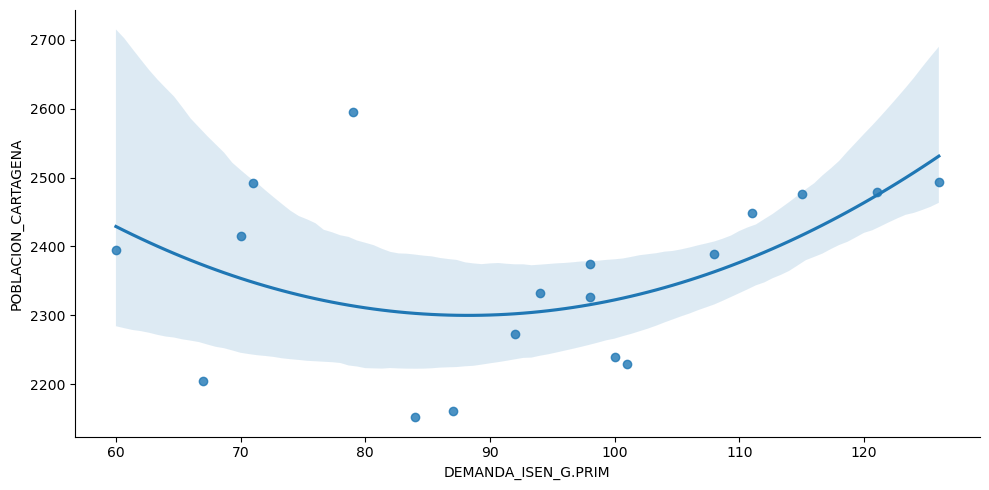

In [30]:
# vamos a estimar una regresión polinómica de orden 2 para la NOTA_CORTE
sns.lmplot(x='DEMANDA_ISEN_G.PRIM',y='POBLACION_CARTAGENA', data=df_ajustado, order=2, aspect=2)

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 33, Finished, Available)

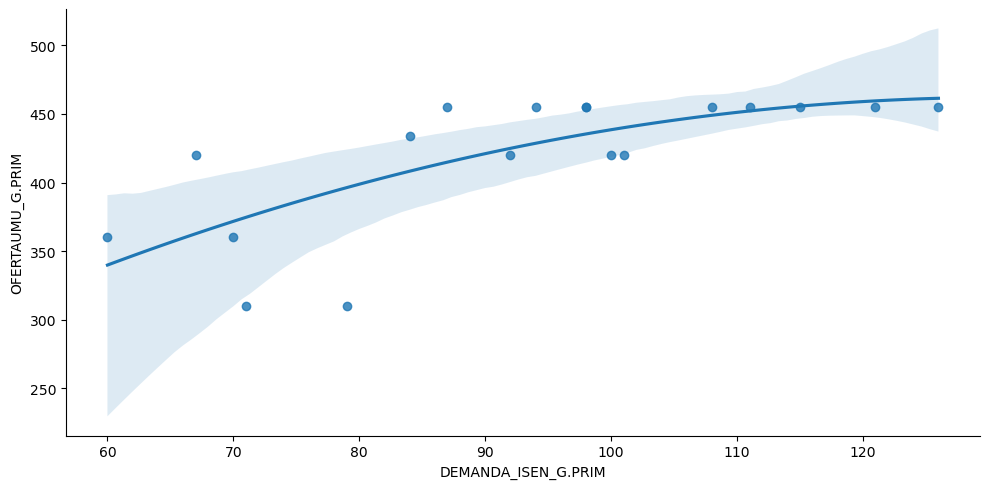

In [31]:
# vamos a estimar una regresión polinómica de orden 2 para poblacion_cartagena
sns.lmplot(x='DEMANDA_ISEN_G.PRIM',y='OFERTAUMU_G.PRIM', data=df_ajustado, order=2, aspect=2)

**Vamos a seleccionar los datos para el entrenamiento y test**

In [32]:
# seleccionamos las varIables x e y para nuestro modelo 

X = df_ajustado.drop('DEMANDA_ISEN_G.PRIM', axis=1)
y = df_ajustado['DEMANDA_ISEN_G.PRIM']

feature_names = ('OFERTAUMU_G.PRIM','DEMANDAUNIV_G.PRIM','POBLACION_CARTAGENA','GASTO_PUBLICIDAD')

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 4)

print('Train and test sizes {} {}'.format(X_train.shape, X_test.shape))

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 34, Finished, Available)

Train and test sizes (12, 4) (6, 4)


**Regresión Múltiple**

In [33]:
# importamos las librerias
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

# Value of y intercept
lm.intercept_

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 35, Finished, Available)

-215.1916530798665

In [34]:
#Converting the coefficient values to a dataframe
lm.coef_

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 36, Finished, Available)

array([ 3.75230204e-01, -4.38682999e-02,  8.68611585e-02, -1.57638313e-04])

In [35]:
coeffcients = pd.DataFrame([feature_names,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 37, Finished, Available)

Attribute Coefficients
0     OFERTAUMU_G.PRIM      0.37523
1   DEMANDAUNIV_G.PRIM    -0.043868
2  POBLACION_CARTAGENA     0.086861
3     GASTO_PUBLICIDAD    -0.000158

vemos que la variable OFERTA_UMU_G.PRIM es la que va a tener mayor peso en el modelo

In [36]:
# cargamos las librerias para ver el error del modelo, 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 38, Finished, Available)

In [37]:
# Model prediction on train data
y_pred = lm.predict(X_train)

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 39, Finished, Available)

In [38]:
# Model Evaluation
# Train data

print('R^2:',r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_pred))
print('MSE:',mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred)))

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 40, Finished, Available)

R^2: 0.8296617805645987
Adjusted R^2: 0.7323256551729409
MAE: 5.453223426401498
MSE: 58.013175665072104
RMSE: 7.61663808153388


en vista de los resultados, el R2 nos da que el modelo está bien ajustado, sin embargo, el valor del MSE es muy alto para la variable a estimar, ya que los valores de la misma varian de 50 a 150, y el MSE es 58.01. Al no haber outliers, podemos pensar que el modelo este haciendo overfitting ()

In [39]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 41, Finished, Available)

In [40]:
# Model Evaluation
acc_linreg = r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 42, Finished, Available)

R^2: 0.3722420164224697
Adjusted R^2: -2.1387899178876517
MAE: 12.013776283956778
MSE: 183.46227070053325
RMSE: 13.544824498698137


Con estos datos podemos observar que el modelo no está generalizando bien los nuevos datos, necesita un ajuste o las variables no son lo suficientemente significativas para explicar la demanda

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 43, Finished, Available)

<AxesSubplot: title={'center': 'Model Coefficients'}>

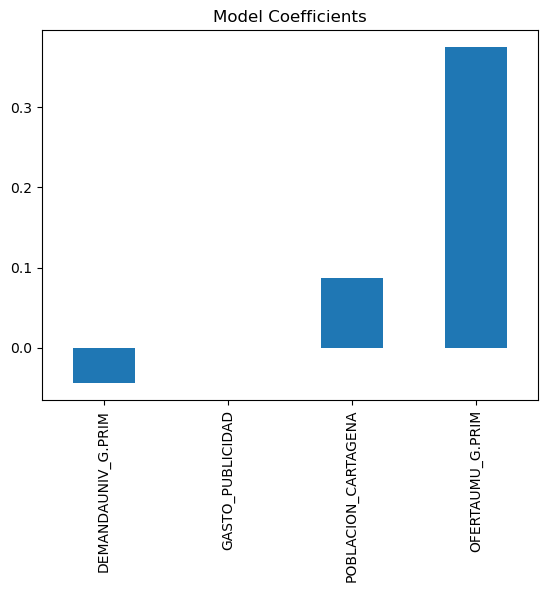

In [41]:
from pandas import Series

# Plotting model coefficients:
coef = Series(lm.coef_, feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 44, Finished, Available)

In [43]:
X_train

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 45, Finished, Available)

OFERTAUMU_G.PRIM  DEMANDAUNIV_G.PRIM  POBLACION_CARTAGENA  \
15               455                 963                 2389   
12               455                1164                 2374   
10               455                1008                 2326   
13               455                1089                 2479   
9                455                 985                 2161   
2                360                 772                 2395   
17               455                 930                 2494   
7                420                 885                 2229   
8                434                 974                 2152   
1                310                 719                 2492   
5                420                 839                 2273   
14               455                1102                 2449   

    GASTO_PUBLICIDAD  
15             65362  
12             56240  
10             64236  
13             46856  
9              72352  
2              96620  
17             56250  
7              56758  
8              62538  
1             153420  
5              65479  
14             56823

In [44]:
X_train_scaled = sc.fit_transform(X_train)
y_train_scaled = sc.fit_transform(y_train.array.reshape(-1, 1))
print(X_train_scaled.shape)
print(y_train_scaled.shape)

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 46, Finished, Available)

(12, 4)
(12, 1)


In [45]:
X_train_scaled

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 47, Finished, Available)

array([[ 0.61922619,  0.08226948,  0.32091222, -0.20810092],
       [ 0.61922619,  1.65714239,  0.19395793, -0.54021289],
       [ 0.61922619,  0.43485297, -0.21229578, -0.24909611],
       [ 0.61922619,  1.06950325,  1.08263792, -0.88186369],
       [ 0.61922619,  0.25464363, -1.6087929 ,  0.04638961],
       [-1.51345615, -1.41425155,  0.37169393,  0.92993412],
       [ 0.61922619, -0.17629174,  1.20959221, -0.53984881],
       [-0.16649888, -0.52887523, -1.03326681, -0.52135364],
       [ 0.14779114,  0.16845656, -1.68496547, -0.31091655],
       [-2.63592053, -1.82951654,  1.19266497,  2.99789723],
       [-0.16649888, -0.88929391, -0.66086758, -0.20384121],
       [ 0.61922619,  1.1713607 ,  0.82872936, -0.51898714]])

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 48, Finished, Available)

(array([1., 1., 0., 1., 2., 2., 1., 2., 0., 2.]),
 array([ 60. ,  66.6,  73.2,  79.8,  86.4,  93. ,  99.6, 106.2, 112.8,
        119.4, 126. ]),
 <BarContainer object of 10 artists>)

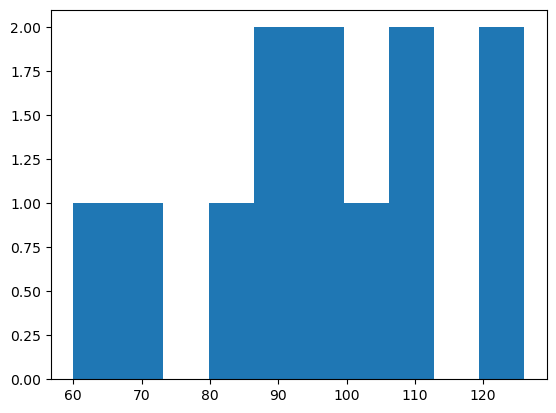

In [46]:
plt.hist(y_train) 

In [47]:
# Create a Linear regressor
lm_scaled = LinearRegression()

# Train the model using the training sets 
lm_scaled.fit(X_train_scaled, y_train_scaled)

# Value of y intercept
lm_scaled.intercept_

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 49, Finished, Available)

array([8.58621886e-16])

In [48]:
# Model prediction on train data
y_pred = lm_scaled.predict(X_train_scaled)

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 50, Finished, Available)

In [49]:
# Model Evaluation
# Train data

print('R^2:',r2_score(y_train_scaled, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_train_scaled, y_pred))*(len(y_train_scaled)-1)/(len(y_train_scaled)-X_train_scaled.shape[1]-1))
print('MAE:',mean_absolute_error(y_train_scaled, y_pred))
print('MSE:',mean_squared_error(y_train_scaled, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train_scaled, y_pred)))

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 51, Finished, Available)

R^2: 0.829661780564599
Adjusted R^2: 0.7323256551729413
MAE: 0.29549220141445937
MSE: 0.17033821943540098
RMSE: 0.41272051007358596


In [50]:
# Predicting Test data with the model
y_test_pred_scaled = lm.predict(X_test)

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 52, Finished, Available)

In [51]:
# Model Evaluation
acc_linreg = r2_score(y_test, y_test_pred_scaled)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred_scaled))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_test_pred_scaled))
print('MSE:',mean_squared_error(y_test, y_test_pred_scaled))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred_scaled)))

StatementMeta(, f1a83be9-82a3-4582-9baa-3dca8fe74125, 53, Finished, Available)

R^2: 0.3722420164224697
Adjusted R^2: -2.1387899178876517
MAE: 12.013776283956778
MSE: 183.46227070053325
RMSE: 13.544824498698137
